In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
aapl_df = pd.read_csv("AAPL.csv")
fb_df = pd.read_csv("FB.csv")
amzn_df = pd.read_csv("AMZN.csv")
goog_df = pd.read_csv("GOOG.csv")
nflx_df = pd.read_csv("NFLX.csv")

In [3]:
print(aapl_df.shape)
print(aapl_df.columns)
aapl_df.isnull().values.any()
aapl_df = aapl_df.dropna()
aapl_df.shape

(9909, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


(9909, 7)

In [4]:
print(fb_df.shape)
print(fb_df.columns)
fb_df.isnull().values.any()
fb_df = fb_df.dropna()
fb_df.shape

(1980, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


(1980, 7)

In [5]:
print(amzn_df.shape)
print(amzn_df.columns)
amzn_df.isnull().values.any()
amzn_df = amzn_df.dropna()
amzn_df.shape

(5758, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


(5758, 7)

In [6]:
print(nflx_df.shape)
print(nflx_df.columns)
nflx_df.isnull().values.any()
nflx_df = nflx_df.dropna()
nflx_df.shape

(4496, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


(4496, 7)

In [7]:
print(goog_df.shape)
print(goog_df.columns)
goog_df.isnull().values.any()
goog_df = goog_df.dropna()
goog_df.shape

(3932, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


(3932, 7)

In [8]:
fb_df.index = pd.to_datetime(fb_df['Date'])
aapl_df.index = pd.to_datetime(aapl_df['Date'])
amzn_df.index = pd.to_datetime(amzn_df['Date'])
nflx_df.index = pd.to_datetime(nflx_df['Date'])
goog_df.index = pd.to_datetime(goog_df['Date'])

Text(0.5, 1.0, 'GOOG Open/Close Prices')

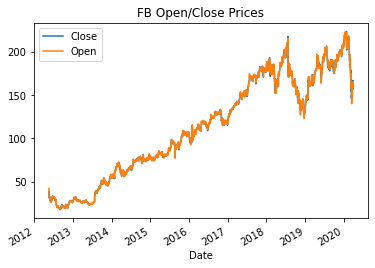

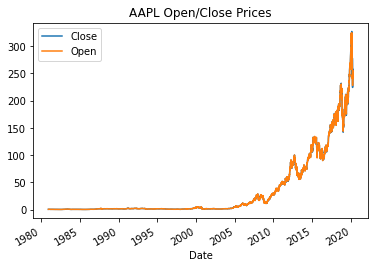

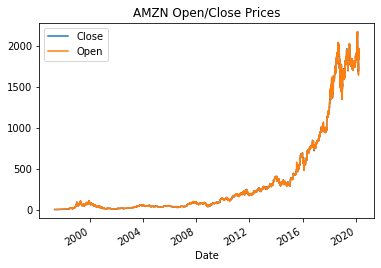

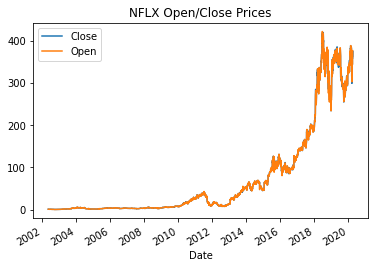

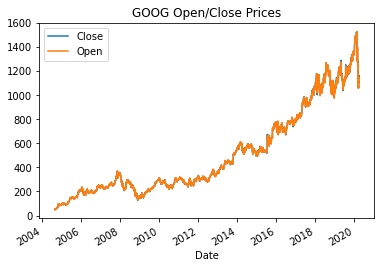

In [9]:
fb_df[['Close', 'Open']].plot()
#fb_df.iloc[0:1000].plot(y = 'Close')
plt.title('FB Open/Close Prices')

aapl_df[['Close', 'Open']].plot()
plt.title('AAPL Open/Close Prices')

amzn_df[['Close', 'Open']].plot()
plt.title('AMZN Open/Close Prices')

nflx_df[['Close', 'Open']].plot()
plt.title('NFLX Open/Close Prices')

goog_df[['Close', 'Open']].plot()
plt.title('GOOG Open/Close Prices')

In [10]:

def explore_stock(data):
    plt.figure(figsize=(5,5))
    lag_plot(data['Close'], lag=1)
    plt.title('Autocorrelation plot - Lag 1');
    
    plt.figure(figsize=(5,5))
    lag_plot(data['Close'], lag=5)
    plt.title('Autocorrelation plot - Lag 5');
    
    train_data, test_data = data.iloc[0:int(len(data)*0.8), :], data.iloc[int(len(data)*0.8):, :]
    plt.figure(figsize=(12,7))
    plt.title('Prices')
    plt.xlabel('Dates')
    plt.ylabel('Prices')
    plt.plot(train_data['Close'], 'blue', label='Training Data')
    plt.plot(test_data['Close'], 'green', label='Testing Data')
    plt.legend();
    
    window = 7
    train_series = train_data['Close']

    #Determing rolling statistics
    rolmean = train_series.rolling(window).mean()
    rolstd = train_series.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(10, 6))
    orig = plt.plot(train_series, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation');
    
    train_diff = train_series.diff()
    train_diff = train_diff.dropna(inplace = False)

    train_diff.head()

    #Determing rolling statistics
    diff_rolmean = train_diff.rolling(window).mean()
    diff_rolstd = train_diff.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(10, 6))
    orig = plt.plot(train_diff, color='blue',label='Original')
    mean = plt.plot(diff_rolmean, color='red', label='Rolling Mean')
    std = plt.plot(diff_rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation diff=1');

    dftest = adfuller(train_diff, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    fig, ax = plt.subplots(2, 1, figsize=(12,8))
    plot_acf(train_diff, ax=ax[0]); # 
    plot_pacf(train_diff, ax=ax[1]);

Test Statistic                -1.206890e+01
p-value                        2.373027e-22
#Lags Used                     3.300000e+01
Number of Observations Used    7.892000e+03
Critical Value (1%)           -3.431179e+00
Critical Value (5%)           -2.861906e+00
Critical Value (10%)          -2.566965e+00
dtype: float64


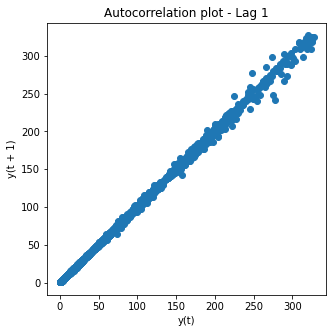

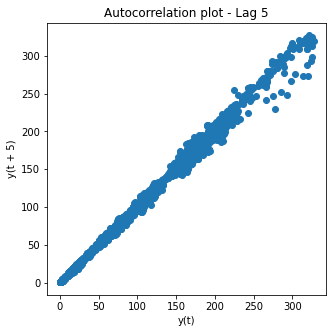

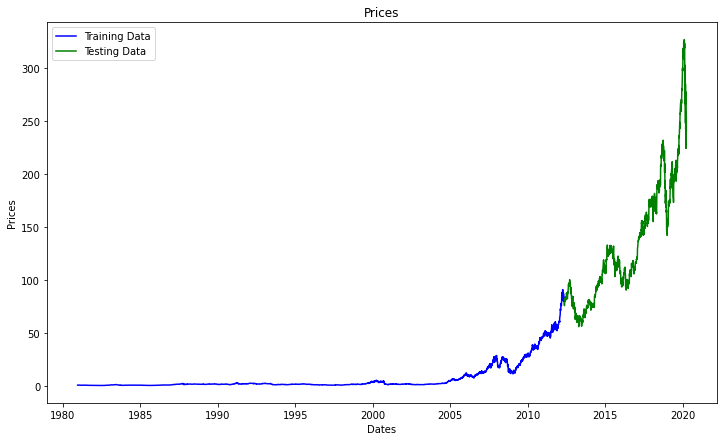

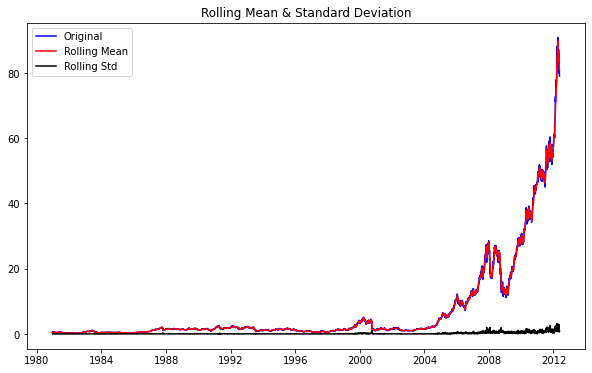

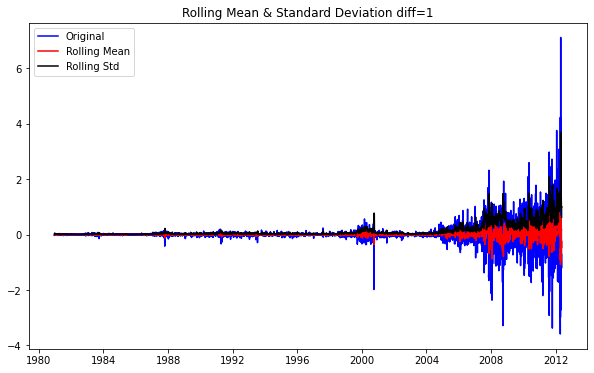

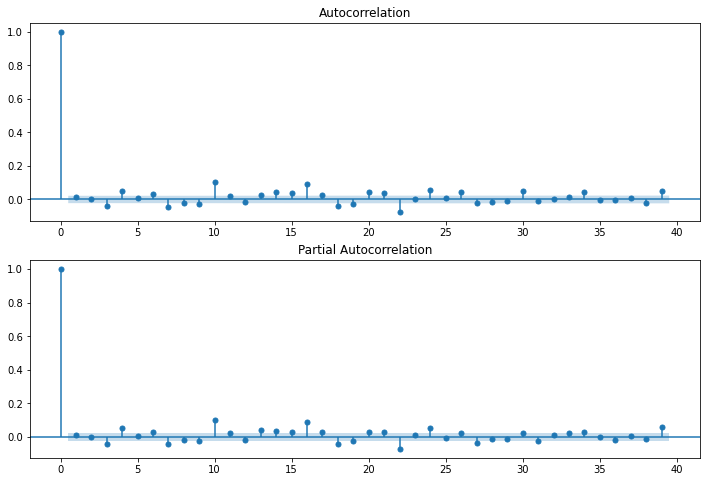

In [11]:
explore_stock(aapl_df)

Test Statistic                  -19.787931
p-value                           0.000000
#Lags Used                        4.000000
Number of Observations Used    1578.000000
Critical Value (1%)              -3.434501
Critical Value (5%)              -2.863373
Critical Value (10%)             -2.567746
dtype: float64


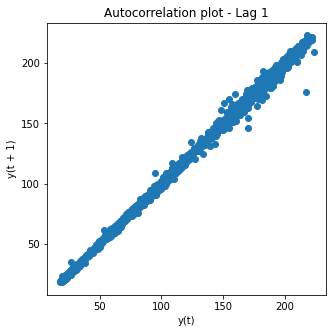

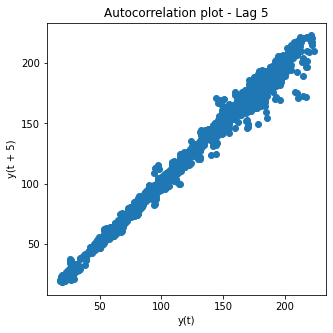

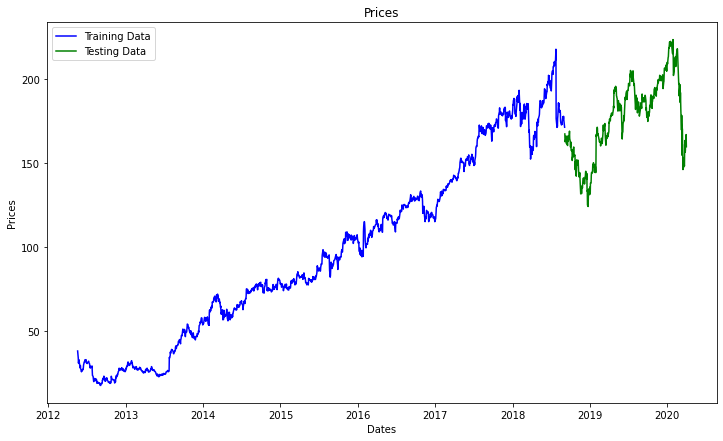

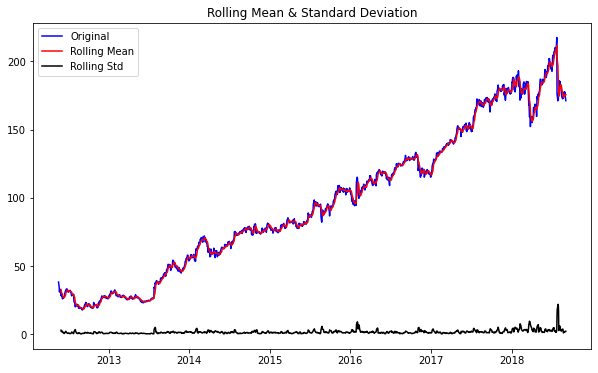

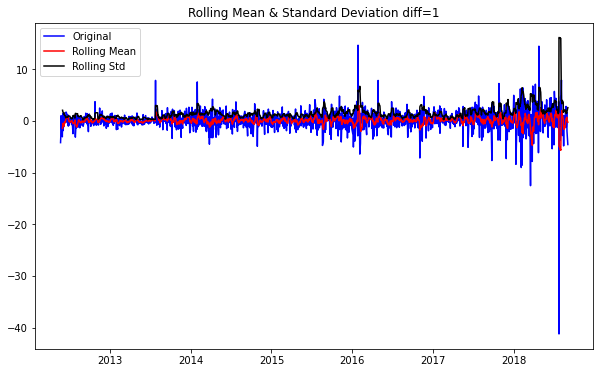

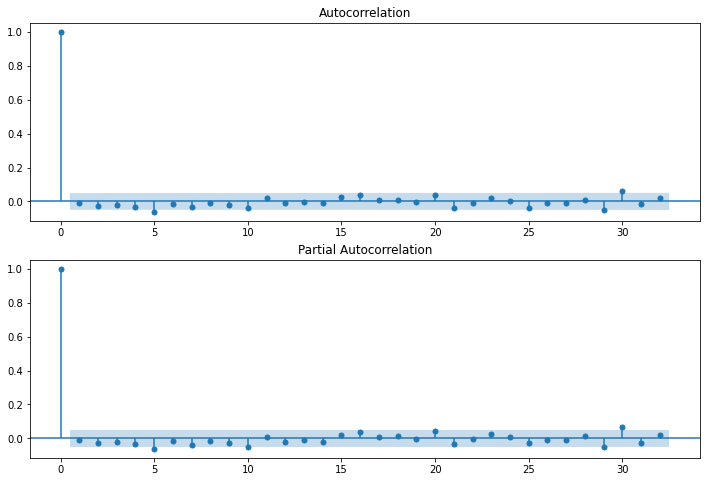

In [12]:
explore_stock(fb_df)

Test Statistic                -1.519480e+01
p-value                        5.941405e-28
#Lags Used                     2.200000e+01
Number of Observations Used    4.582000e+03
Critical Value (1%)           -3.431778e+00
Critical Value (5%)           -2.862171e+00
Critical Value (10%)          -2.567106e+00
dtype: float64


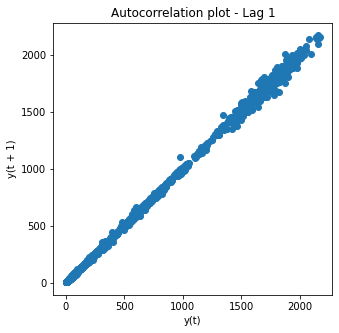

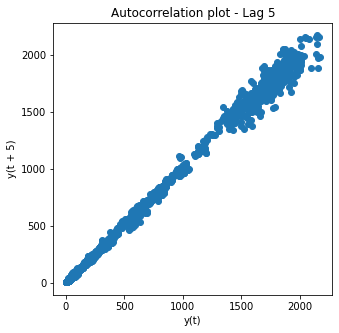

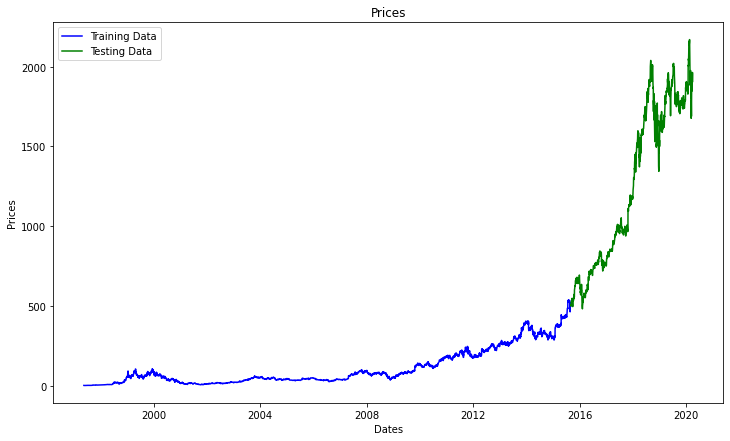

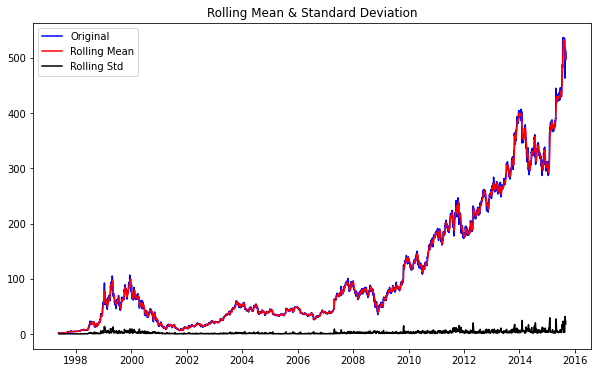

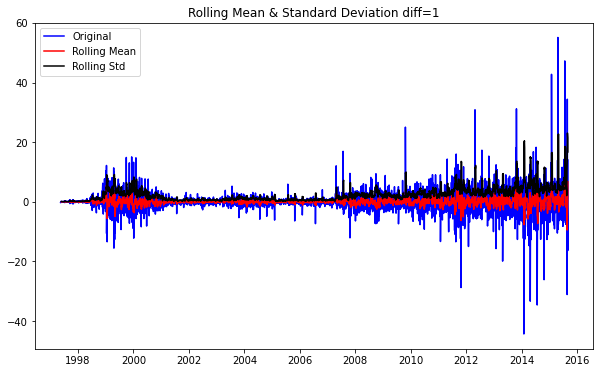

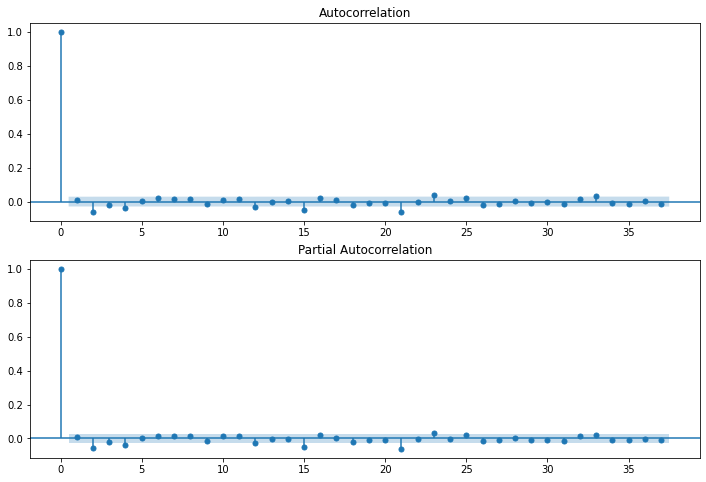

In [13]:
explore_stock(amzn_df)

Test Statistic                -1.129583e+01
p-value                        1.344517e-20
#Lags Used                     2.900000e+01
Number of Observations Used    3.565000e+03
Critical Value (1%)           -3.432186e+00
Critical Value (5%)           -2.862351e+00
Critical Value (10%)          -2.567202e+00
dtype: float64


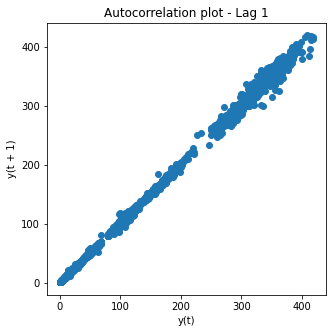

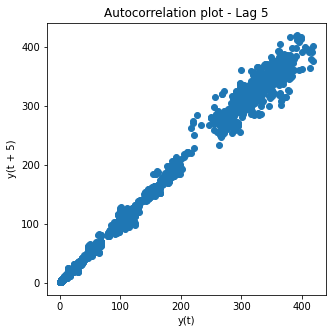

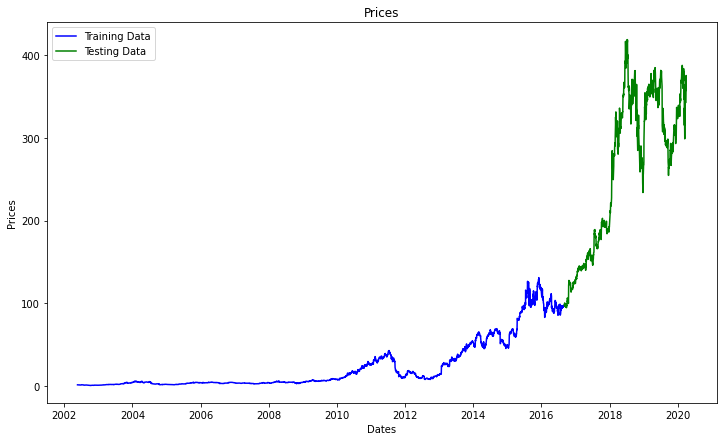

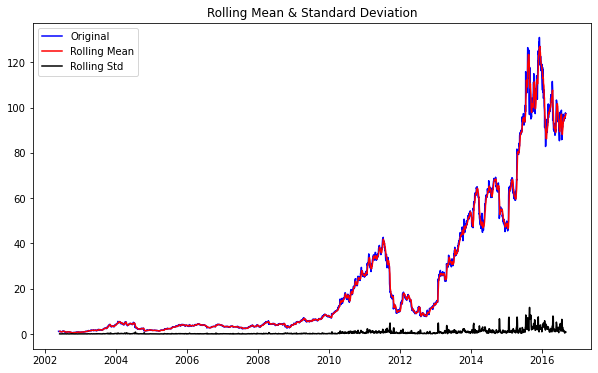

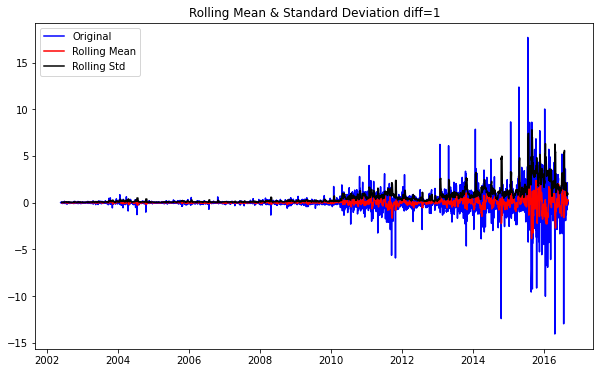

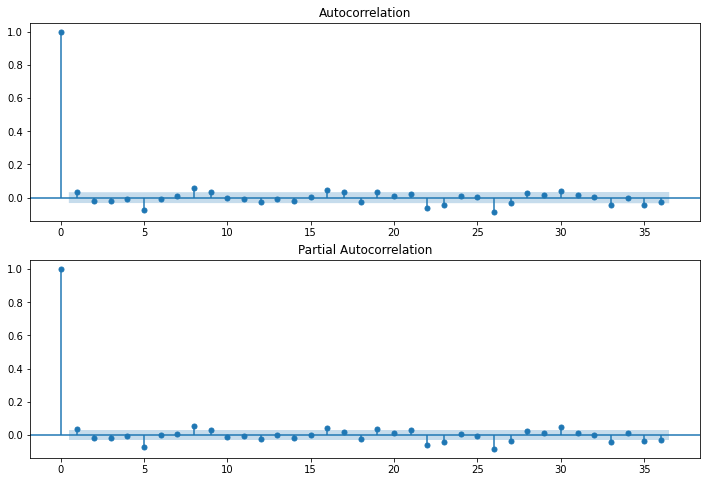

In [14]:
explore_stock(nflx_df)

Test Statistic                  -33.515066
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    3141.000000
Critical Value (1%)              -3.432434
Critical Value (5%)              -2.862461
Critical Value (10%)             -2.567260
dtype: float64


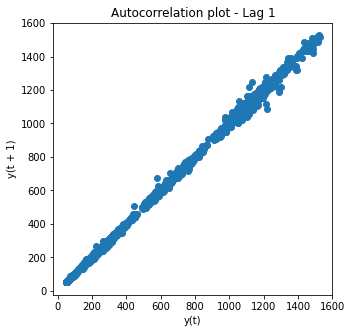

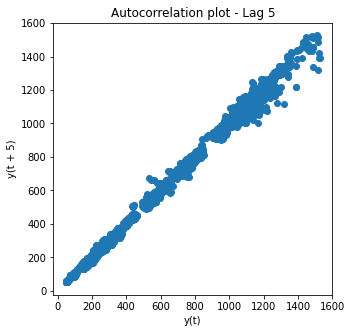

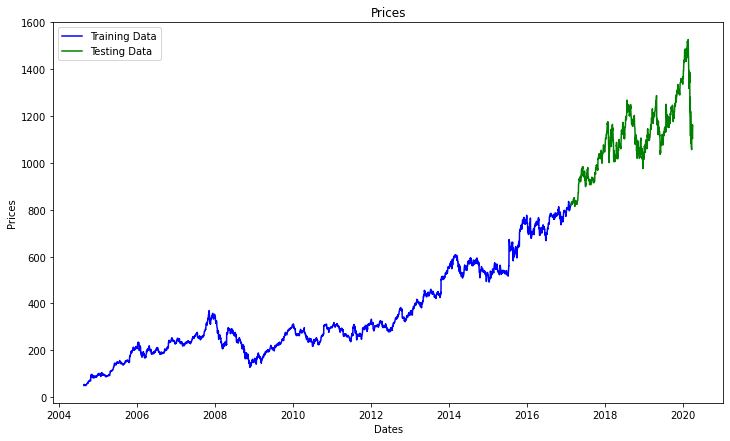

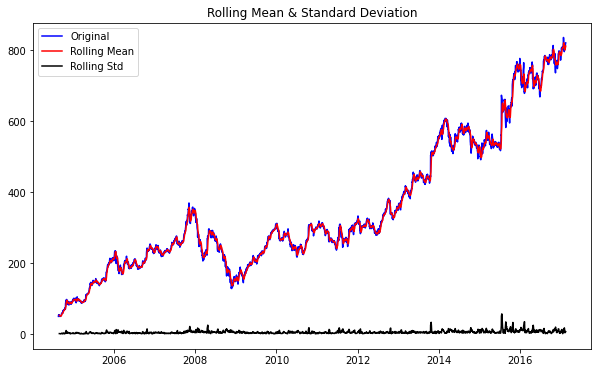

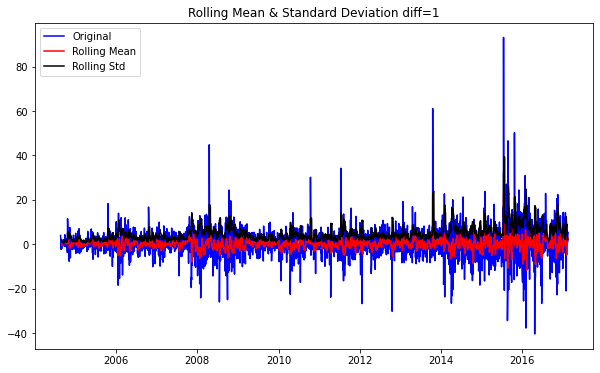

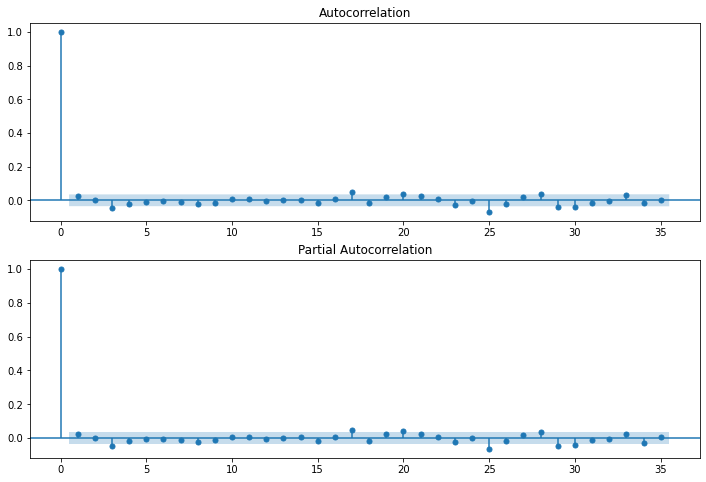

In [15]:
explore_stock(goog_df)

In [16]:
#Set initial values and some bounds
def smape_kun(y_true, y_pred):
    # START_CODE_HERE
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))
    # END_CODE_HERE

In [41]:
def fit_arima(data, p, d, q):
    train_data, test_data = data.iloc[0:int(len(data)*0.8), :], data.iloc[int(len(data)*0.8):, :]
    test_series = test_data['Close']
    train_series = train_data['Close']

    history = [x for x in train_series]

    predictions = list()
    for t in range(len(test_series)):
        # START_CODE_HERE - call the ARIMA Method with history and params
        model = ARIMA(history, order=(p,d, q))  # initialize the model with history and right order of parameters
        model_fit = model.fit()  # fit the model
        # END_CODE_HERE

        output = model_fit.forecast()  # use forecast on the fitted model
        yhat = output[0]
        predictions.append(yhat)

        obs = test_series[t]
        history.append(obs)

        if t % 100 == 0:
          print('Test Series Point: {}\tPredicted={}, Expected={}'.format(t, yhat, obs))

    predictions_series = pd.Series(predictions)
    predictions_series.index = test_series.index
    
    predictions_series.head()
        
    error = mean_squared_error(test_series, predictions_series)
    print('Testing Mean Squared Error: %.3f' % error)
    error2 = smape_kun(test_series, predictions_series)
    print('Symmetric Mean absolute percentage error: %.3f' % error2)
    
    plt.figure(figsize=(12,7))
    plt.title('Prices')
    plt.xlabel('Dates')
    plt.ylabel('Prices')
    plt.plot(train_series, color='blue', label='Training Prices')
    plt.plot(test_series, color='green', marker='.', label='Testing Prices - Reverse Diff Transform')
    plt.plot(predictions_series, color='red', linestyle='--', label='Forecasted Prices - Reverse Diff Transform')
    plt.legend();
    
    plt.figure(figsize=(12,7))
    plt.title('Prices')
    plt.xlabel('Dates')
    plt.ylabel('Prices')
    plt.plot(test_series, color='green', marker='.', label='Testing Prices - Reverse Diff Transform')
    plt.plot(predictions_series, color='red', linestyle='--', label='Forecasted Prices - Reverse Diff Transform')
    plt.legend();

Test Series Point: 0	Predicted=79.02428436279297, Expected=78.01142883300781


C:\Users\raholr\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test Series Point: 100	Predicted=93.22714233398438, Expected=91.16714477539062


C:\Users\raholr\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\raholr\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test Series Point: 200	Predicted=61.591426849365234, Expected=60.808570861816406
Test Series Point: 300	Predicted=62.998573303222656, Expected=63.970001220703125
Test Series Point: 400	Predicted=79.28428649902344, Expected=78.68142700195312
Test Series Point: 500	Predicted=84.82286071777344, Expected=84.83856964111328
Test Series Point: 600	Predicted=99.62000274658205, Expected=99.62000274658205
Test Series Point: 700	Predicted=128.4600067138672, Expected=129.08999633789062
Test Series Point: 800	Predicted=125.22000122070311, Expected=125.16000366210938
Test Series Point: 900	Predicted=113.18000030517578, Expected=112.4800033569336
Test Series Point: 1000	Predicted=92.72000122070312, Expected=92.79000091552734
Test Series Point: 1100	Predicted=113.9499969482422, Expected=112.18000030517578
Test Series Point: 1200	Predicted=137.11000061035156, Expected=136.52999877929688
Test Series Point: 1300	Predicted=149.55999755859375, Expected=150.0800018310547
Test Series Point: 1400	Predicted=16

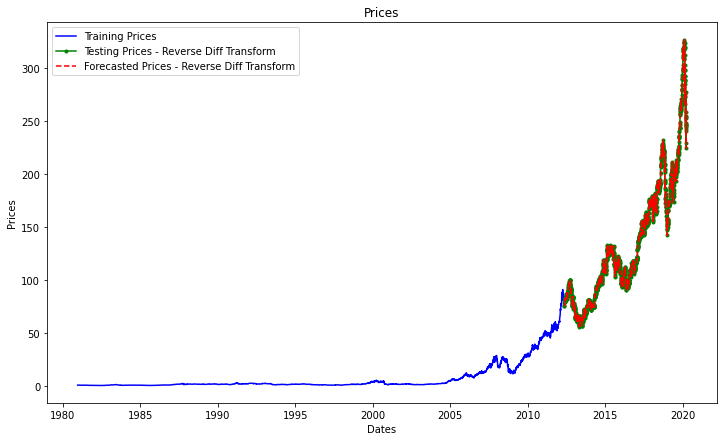

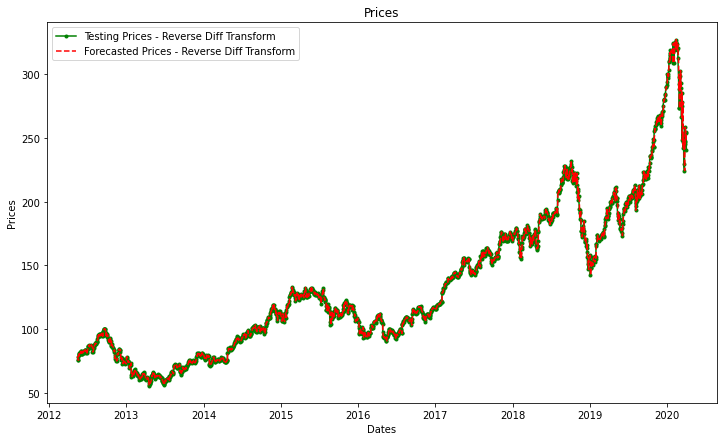

In [42]:
fit_arima(aapl_df, 0,1,0)

Test Series Point: 0	Predicted=171.16000366210938, Expected=167.17999267578125
Test Series Point: 100	Predicted=144.19000244140625, Expected=150.4199981689453
Test Series Point: 200	Predicted=191.13999938964844, Expected=192.6000061035156
Test Series Point: 300	Predicted=194.47000122070312, Expected=193.19000244140625
Testing Mean Squared Error: 15.364
Symmetric Mean absolute percentage error: 1.586


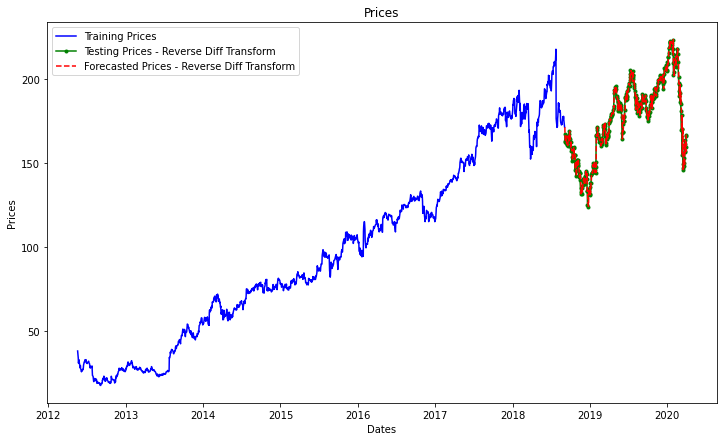

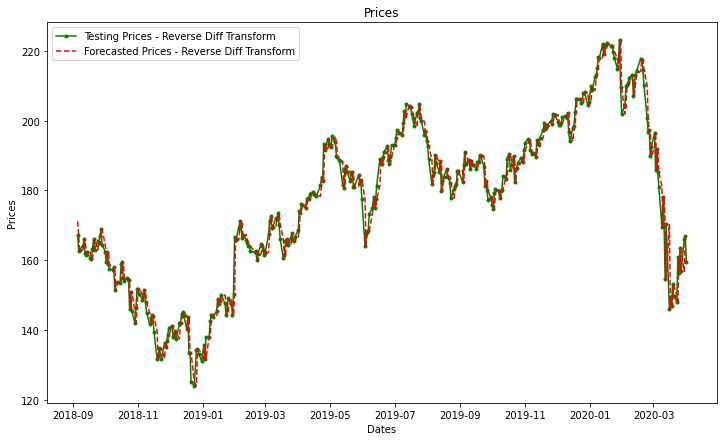

In [43]:
fit_arima(fb_df, 0,1,0)

Test Series Point: 0	Predicted=510.5499877929688, Expected=504.7200012207031
Test Series Point: 100	Predicted=583.3499755859375, Expected=635.3499755859375
Test Series Point: 200	Predicted=714.010009765625, Expected=715.8200073242188
Test Series Point: 300	Predicted=771.8800048828125, Expected=742.3800048828125
Test Series Point: 400	Predicted=909.280029296875, Expected=898.280029296875
Test Series Point: 500	Predicted=946.02001953125, Expected=954.0599975585938
Test Series Point: 600	Predicted=1327.31005859375, Expected=1362.5400390625
Test Series Point: 700	Predicted=1723.8599853515625, Expected=1715.969970703125
Test Series Point: 800	Predicted=1627.800048828125, Expected=1642.81005859375
Test Series Point: 900	Predicted=1813.97998046875, Expected=1820.699951171875
Test Series Point: 1000	Predicted=1749.6199951171875, Expected=1768.8699951171875
Test Series Point: 1100	Predicted=1877.93994140625, Expected=1864.719970703125
Testing Mean Squared Error: 661.424
Symmetric Mean absolute 

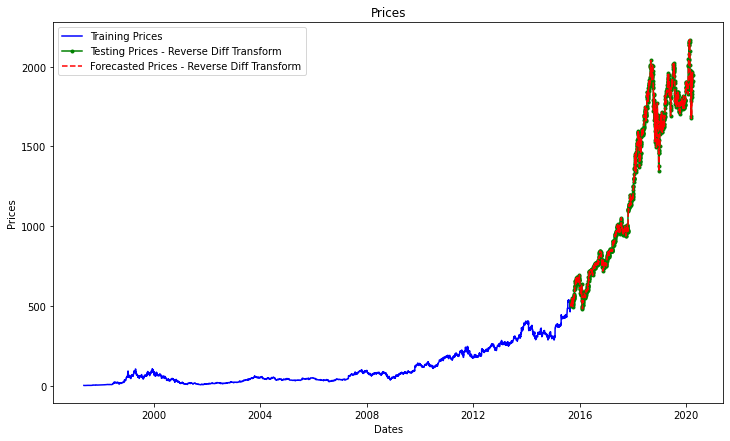

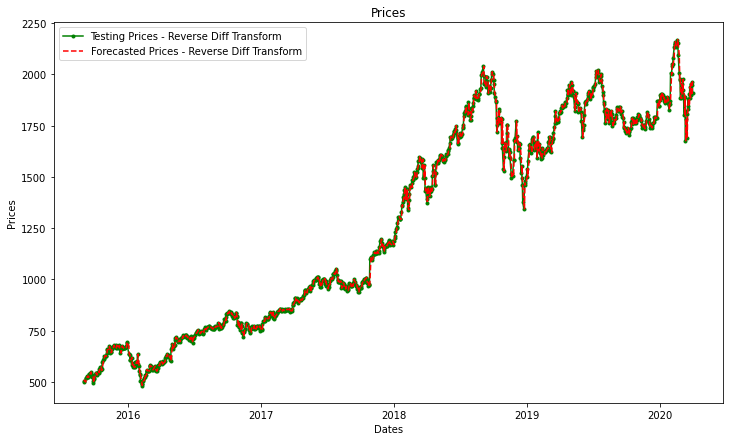

In [44]:
fit_arima(amzn_df, 0, 1, 0)

Test Series Point: 0	Predicted=820.4500122070312, Expected=818.97998046875
Test Series Point: 100	Predicted=928.7999877929688, Expected=930.0900268554688
Test Series Point: 200	Predicted=1021.6599731445314, Expected=1021.4099731445312
Test Series Point: 300	Predicted=1021.1799926757812, Expected=1040.0400390625
Test Series Point: 400	Predicted=1156.050048828125, Expected=1161.219970703125
Test Series Point: 500	Predicted=1095.010009765625, Expected=1121.3699951171875
Test Series Point: 600	Predicted=1131.5899658203125, Expected=1116.3499755859375
Test Series Point: 700	Predicted=1306.68994140625, Expected=1313.550048828125
Testing Mean Squared Error: 387.212
Symmetric Mean absolute percentage error: 1.135


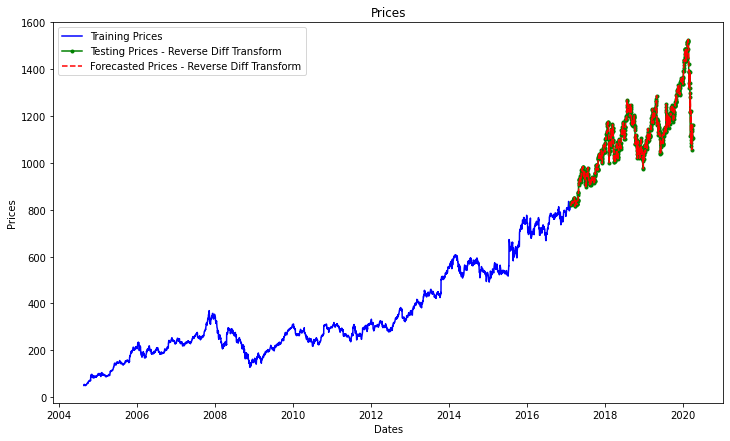

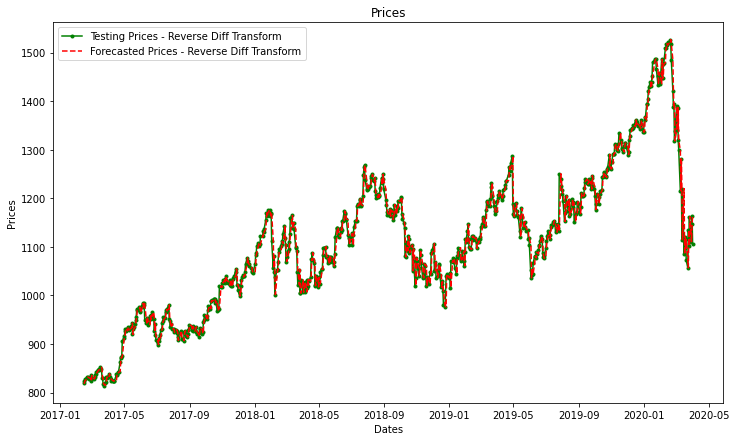

In [45]:
fit_arima(goog_df, 0, 1, 0)

Test Series Point: 0	Predicted=97.37999725341795, Expected=97.37999725341795
Test Series Point: 100	Predicted=138.9600067138672, Expected=142.4499969482422
Test Series Point: 200	Predicted=152.0500030517578, Expected=155.02999877929688
Test Series Point: 300	Predicted=193.8999938964844, Expected=192.0200042724609
Test Series Point: 400	Predicted=288.8500061035156, Expected=289.92999267578125
Test Series Point: 500	Predicted=368.489990234375, Expected=368.0400085449219
Test Series Point: 600	Predicted=321.989990234375, Expected=326.6700134277344
Test Series Point: 700	Predicted=350.6199951171875, Expected=357.1199951171875
Test Series Point: 800	Predicted=288.5899963378906, Expected=289.57000732421875
Testing Mean Squared Error: 51.207
Symmetric Mean absolute percentage error: 1.708


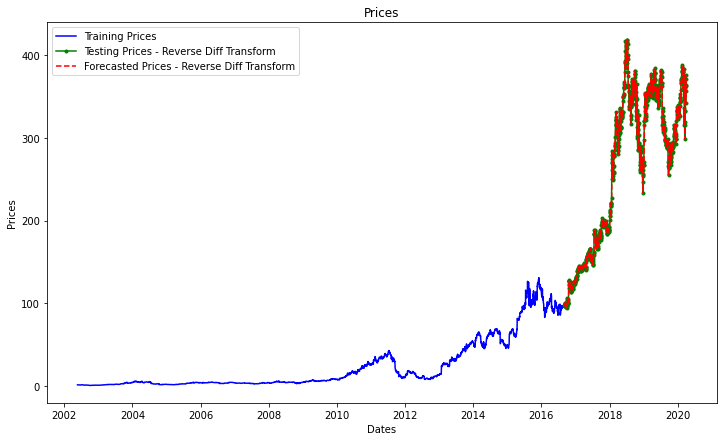

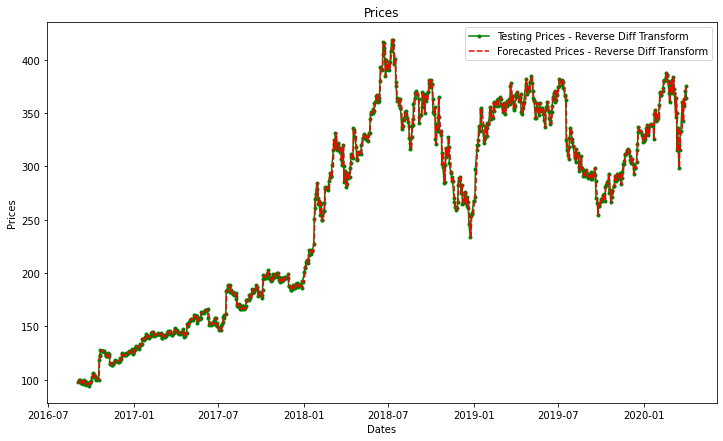

In [46]:
fit_arima(nflx_df, 0, 1, 0)